## LSTM MODELING, TRAINING AND EVALUATION

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Embedding
from keras.regularizers import l2
import keras.backend as K
import tensorflow as tf
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


### Customized Correlation Metrics built with Keras Backend

In [2]:
def correlation_m(y_true, y_pred):
    r_num = K.sum((y_pred - K.mean(y_pred)) * (y_true - K.mean(y_true)))
    r_den = K.sqrt(K.sum(((y_pred - K.mean(y_pred))**2) * ((y_true - K.mean(y_true))**2)))
    
    r = r_num / r_den
    r = K.maximum(K.minimum(r, 1.0), -1.0)
    
    return r

### Model Generation

In [3]:
def gen_model_classifier():
    model = Sequential()
    model.add(LSTM(12, activation="tanh", recurrent_activation="sigmoid", return_sequences = True, input_shape = (1, len(fea))))
    model.add(LSTM(8, activation="tanh", recurrent_activation="sigmoid", return_sequences = True))
    model.add(LSTM(4,activation="tanh", recurrent_activation="sigmoid", return_sequences = True))
    model.add(keras.layers.Dense(2, activation = 'softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.004, clipvalue=0.5)
    
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=[correlation_m,  tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError() ,'accuracy'])
    return model

#### Setting parameters

In [4]:
#set parameters
epcs = 100 #number of epochs
vrbs = 0   #print or not the training informations, change 0-1
plotting = False #put True or False if you want to see or not the plot of loss and accuracy during training

#### Automatic Process and Results Append

In [5]:
filename = []
results = []
for file in os.listdir('./Datasets/'):
    if file.endswith('.csv'):
        filename.append(str(file))
        print('......................................................................................')
        print('......................................................................................')
        print('Processing the following csv:',file)
        df=pd.read_csv('./Datasets/'+file, sep =';')
        df = df.dropna()
        fea = df.columns[:-1]
        target = df.columns[-1]
        #print(df[fea])
        #print(str(file), 'with features: ', str(fea), 'and target: ', str(target))
        scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(df[fea]) 
        scaled_df = scaler.transform(df[fea])
        tgt = (df[target]>0)*1
        scaled_df = df[fea].values.reshape(-1, 1, len(fea))
        X_train, X_test, y_train, y_test = train_test_split(scaled_df, tgt, test_size=0.33, random_state=123)
        model = gen_model_classifier()
        print('-------------------------------...Training...-----------------------------------------')
        # Fit data to model
        history = model.fit(X_train, y_train, epochs=epcs,verbose=vrbs)
        if plotting:
            pd.DataFrame(history.history['loss']).plot(figsize=(20,5), label = 'LOSS')
            pd.DataFrame(history.history['accuracy']).plot(figsize=(20,5), label = 'ACCURACY')
            plt.grid(True)
            plt.title('Variations of the loss during the training of the fold n.')
            plt.show()           
        
        # Generate generalization metrics
        scores = model.evaluate(X_test, y_test, verbose=1)
        
        results.append({'Correlation': scores[1]*100,
                        'Mean Absolute Error': scores[3],
                        'Root Mean Squared Error': scores[2],
                        'Accuracy': scores[4]*100})
#save results        
final_result = pd.DataFrame(results)
final_table = pd.concat([pd.DataFrame(filename), final_result], axis = 1)
final_table = final_table.rename(columns = {0:'FSS_Algorithm'})
final_table = final_table.set_index('FSS_Algorithm')
final_table

2022-02-05 19:39:53.640751: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


......................................................................................
......................................................................................
Processing the following csv: Consistency_ElasticSearch_class.csv
-------------------------------...Training...-----------------------------------------


2022-02-05 19:39:54.471813: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-05 19:39:54.472152: W tensorflow/core/platform/profile_utils/cpu_utils.cc:116] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency


67/67 [==============================] - 1s 1ms/step - loss: 0.3007 - correlation_m: nan - root_mean_squared_error: 0.6658 - mean_absolute_error: 0.5000 - accuracy: 0.9032   
......................................................................................
......................................................................................
Processing the following csv: Consistency_MCT_class.csv
-------------------------------...Training...-----------------------------------------
22/22 [==============================] - 1s 1ms/step - loss: 0.2126 - correlation_m: nan - root_mean_squared_error: 0.6776 - mean_absolute_error: 0.5000 - accuracy: 0.9365    
......................................................................................
......................................................................................
Processing the following csv: Consistency_NEO4j_class.csv
-------------------------------...Training...-----------------------------------------
70/70 [======

,Correlation,Mean Absolute Error,Root Mean Squared Error,Accuracy
FSS_Algorithm,,,,
Consistency_ElasticSearch_class.csv,NaN,0.5,0.665841,90.322578
Consistency_MCT_class.csv,NaN,0.5,0.677595,93.648452
Consistency_NEO4j_class.csv,-0.000020,0.5,0.652697,89.561683
LinearCorr_ElasticSearch_class.csv,NaN,0.5,0.707107,99.948716
LinearCorr_MCT_class.csv,NaN,0.5,0.706876,99.678975
LinearCorr_NEO4j_class.csv,NaN,0.5,0.707102,99.845916
OneR_ElasticSearch_class.csv,NaN,0.5,0.706302,99.672747
OneR_MCT_class.csv,NaN,0.5,0.696651,98.375183
OneR_NEO4j_class.csv,0.000004,0.5,0.706159,99.819249


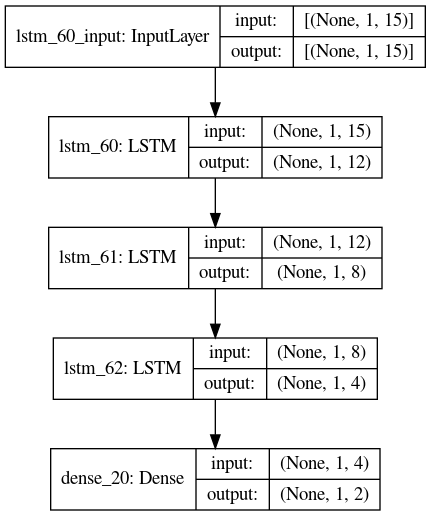

In [6]:
model = gen_model_classifier()
plot_model(model, to_file='../figures/model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
final_table.to_csv('../results/finalresults.csv', sep = ';')

In [9]:
pd.read_csv('../results/finalresults.csv', sep = ';')

,FSS_Algorithm,Correlation,Mean Absolute Error,Root Mean Squared Error,Accuracy
0,Consistency_ElasticSearch_class.csv,NaN,0.5,0.663664,89.901823
1,Consistency_MCT_class.csv,NaN,0.5,0.671278,92.909896
2,Consistency_NEO4J_class.csv,-0.000005,0.5,0.645919,88.929057
3,LinearCorr_ElasticSearch_class.csv,NaN,0.5,0.707106,100.000000
4,LinearCorr_MCT_class.csv,NaN,0.5,0.707057,99.839485
5,LinearCorr_NEO4J_class.csv,NaN,0.5,0.707037,99.897277
6,OneR_ElasticSearch_class.csv,NaN,0.5,0.706140,99.719495
7,OneR_MCT_class.csv,NaN,0.5,0.698703,97.784340
8,OneR_NEO4J_class.csv,-0.000008,0.5,0.705305,99.954814
9,OriginalDatasetElasticsearch-0.90.11-Unified_f...,NaN,0.5,0.706529,100.000000


In [ ]:
#Just an example if we want to convert the classifier model into a regressor.
def gen_model_regressor():
    model = Sequential()
    model.add(LSTM(128, activation="tanh", recurrent_activation="sigmoid", return_sequences = True, input_shape = (1, len(fea))))
    model.add(LSTM(64, activation="tanh", recurrent_activation="sigmoid", return_sequences = True))
    model.add(LSTM(32,activation="tanh", recurrent_activation="sigmoid", return_sequences = True))
    model.add(keras.layers.Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.004)
    
    model.compile(optimizer = optimizer, loss = 'mse', metrics=[correlation_m,  tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError() ,'accuracy'])
    return model

In [ ]:
#use this line to convert the notebook in slides
!jupyter nbconvert --to slides Modeling.ipynb --post serve

[NbConvertApp] Converting notebook Modeling.ipynb to slides
[NbConvertApp] Writing 678626 bytes to Modeling.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Modeling.slides.html
Use Control-C to stop this server
[NbConvertApp] WARNING | No web browser found: could not locate runnable browser.
